###  Задача 6.1

In [1]:
import numpy as np

In [2]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([12, 2, 1])
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

#### Ответ: x = -9,2, y = 0.9, z = 6.4(6)

###  Задача 6.2

In [3]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(A, B, rcond = None)

(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

In [4]:
np.dot(A, [1.13919353, -0.90498444, -0.9009803]) - B

array([-0.76979505,  0.03751835, -0.16349016, -0.21671144,  0.21805317])

#### Ответ: x = 1.13919353, y = -0.90498444, z =-0.9009803

###  Задача 6.3

In [5]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[12, 2, 1]])
print(np.linalg.det(A))
C = np.concatenate((A, B.T), axis=1)
print (C)
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

-9.51619735392994e-16
[[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  1]]


(2, 3)

Так как ранг расширенной матрицы больше, чем ранг матрицы А, система уравнений решений не имеет.
Изменим вектор В

In [6]:
B = np.array([[1, 2, 3]])
print(np.linalg.det(A))
C = np.concatenate((A, B.T), axis=1)
print (C)
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

-9.51619735392994e-16
[[1 2 3 1]
 [4 5 6 2]
 [7 8 9 3]]


(2, 2)

Теперь система имеет бесконечное количество решений вида x + 2y + 3z = 1

###  Задача 6.4

In [7]:
import scipy 
import scipy.linalg 

A = np.array([[1, 2, 3], [2, 16, 21], [4, 28, 73]])
P, L, U = scipy.linalg.lu(A)
det = np.linalg.det(A)

print(f'det = {det: 0.02f}')
print(f'P: \n {P}')
print(f'L: \n {L}')
print(f'U: \n {U}')

det =  432.00
P: 
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
L: 
 [[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
U: 
 [[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


In [8]:
B = np.array([12, 2, 1])
np.linalg.solve(A, B)

array([15.81018519, -1.47453704, -0.28703704])

###  Задача 6.5

In [33]:
from functools import reduce
def Q(X, Y, Z):
    q = []
    x = list(X)
    y = list(Y)
    z = list(Z)
    for i in range(len(z)):
        q.append(x[i]**2 + y[i]**2 + z[i]**2)
    return q

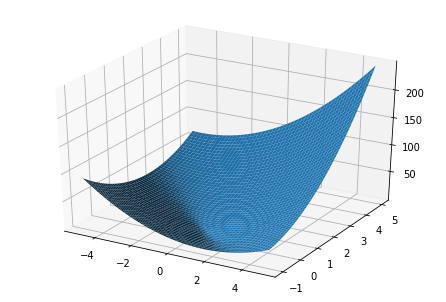

In [40]:
%matplotlib inline
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
fig = figure()
ax = Axes3D(fig)
X = np.linspace(-5, 5, 300)
Y = np.linspace(-1, 5, 300)
X, Y = np.meshgrid(X, Y)
Z = Q(X, Y, X + 2*Y - 1) + (X - X)
ax.plot_surface(X, Y, Z)
show()

In [35]:
A = np.array([[1, 2, -1], [8, -5, 2]])
B = np.array([1, 12])
np.linalg.lstsq(A, B, rcond = None)

(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

###  Задача 6.6

In [41]:
A = np.array([ [1, 2, 3], [4, 5, 6], [7, 8, 9] ])
B = np.array([2, 5, 11])
Q, R = np.linalg.qr(A)
det = np.linalg.det(A)

print(f'det = {det: 0.02f}')
print(f'A: \n {A}')
print(f'Q: \n {Q}')
print(f'R: \n {R}')

det = -0.00
A: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Q: 
 [[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
R: 
 [[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11164740e-15]]


In [42]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [43]:
B1 = np.dot(np.transpose(Q), B)[:2]
B1

array([-1.21860576e+01,  8.54871729e-15])

In [44]:
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 9.45096256e-15])

In [45]:
X = np.append(X1, 0)
print (X)
np.linalg.norm(X)

[1.50000000e+00 9.45096256e-15 0.00000000e+00]


1.4999999999999893

In [46]:
np.linalg.norm(np.dot(A, X) - B)

1.2247448713915885

In [47]:
np.linalg.lstsq(A, B, rcond = None)

(array([ 1.25,  0.5 , -0.25]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16]))

In [48]:
X = np.array([1.25, 0.5, -0.25])
np.linalg.norm(X),  np.linalg.norm(np.dot(A, X) - B)  

(1.3693063937629153, 1.224744871391589)